# Importar Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Para importar un archivo local a la maquina virtual que nos ofrece Google, utilizamos el siguiente codigo

from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df = pd.read_csv('/content/Aptos_BsAs_Todos.csv')

In [ ]:
df.head()

,tipo,Barrio,cant_hab,cant_bath,superficie,precio
0,Casa,Velez Sarsfield,3,2,95,199900
1,Departamento,Nuñez,1,1,44,147000
2,Departamento,Almagro,1,1,40,92294
3,Departamento,Almagro,1,1,49,115000
4,Departamento,Almagro,1,1,40,77000


In [ ]:
#Sirve para saber los datos únicos
print(set(df['tipo']))


{'PH', 'Casa', 'Departamento'}


In [ ]:
print(set(df['Barrio']))

{'Boedo', 'Nuñez', 'Villa Lugano', 'Paternal', 'Villa Luro', 'Floresta', 'Abasto', 'San Nicolás', 'Almagro', 'Las Cañitas', 'Villa General Mitre', 'San Telmo', 'San Cristobal', 'Agronomía', 'Barrio Norte', 'Belgrano', 'Congreso', 'Velez Sarsfield', 'Catalinas', 'Palermo', 'Monte Castro', 'Villa Riachuelo', 'Mataderos', 'Colegiales', 'Villa Pueyrredón', 'Villa Soldati', 'Villa Crespo', 'Parque Patricios', 'Constitución', 'Villa Ortuzar', 'Chacarita', 'Parque Chacabuco', 'Barracas', 'Parque Avellaneda', 'Monserrat', 'Parque Centenario', 'Villa Real', 'Balvanera', 'Retiro', 'Coghlan', 'Parque Chas', 'Recoleta', 'Puerto Madero', 'Villa Urquiza', 'Centro / Microcentro', 'Once', 'Pompeya', 'Villa Devoto', 'Liniers', 'Versalles', 'Villa Santa Rita', 'Boca', 'Villa del Parque', 'Tribunales', 'Flores', 'Caballito', 'Saavedra'}


In [ ]:
print('El dataset de Boston cuenta con {} filas y {} columnas'.format(df.shape[0], df.shape[1]))

El dataset de Boston cuenta con 45904 filas y 6 columnas


# Analizamos el Dataset

In [ ]:
# COMPLETAR CON UNA LINEA DE CODIGO QUE PERMITA VER LOS TIPOS DE DATOS DE CADA COLUMNA
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45904 entries, 0 to 45903
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tipo        45904 non-null  object
 1   Barrio      45904 non-null  object
 2   cant_hab    45904 non-null  int64 
 3   cant_bath   45904 non-null  int64 
 4   superficie  45904 non-null  int64 
 5   precio      45904 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.1+ MB


In [ ]:
# COMPLETAR CON UNA LINEA DE CODIGO QUE PERMITA VER EL RESUMEN ESTADISTICO DE LAS COLUMNAS
df.describe()




,cant_hab,cant_bath,superficie,precio
count,45904.000000,45904.000000,45904.000000,45904.00000
mean,2.717911,1.424102,79.789147,214393.81335
std,1.187498,0.690681,46.656302,140713.24915
min,1.000000,1.000000,28.000000,69500.00000
25%,2.000000,1.000000,46.000000,120000.00000
50%,3.000000,1.000000,65.000000,169000.00000
75%,3.000000,2.000000,99.000000,259000.00000
max,8.000000,5.000000,320.000000,950000.00000


# Inspeccion visual de los datos

Dentro de las alternativas para poder visualizar datos, nos encontramos con diferentes librerias tales como Matplotlib, Seaborn, Pandas, Bokeh, etc. 

A lo largo del curso vamos a utilizar Seaborn, ya que consideramos que posee un buen balance entre versalitidad, simplicidad y funciona muy bien con Pandas. Tambien importaremos Matplotlib, ya que seaborn esta construida sobre ella, y probablemente necesitemos utilizar algunas de las funciones.

In [ ]:
import matplotlib.pyplot as plt # 
import seaborn as sns # como importamos pandas as pd, numpy as np, searbon es comun importarla como sns.

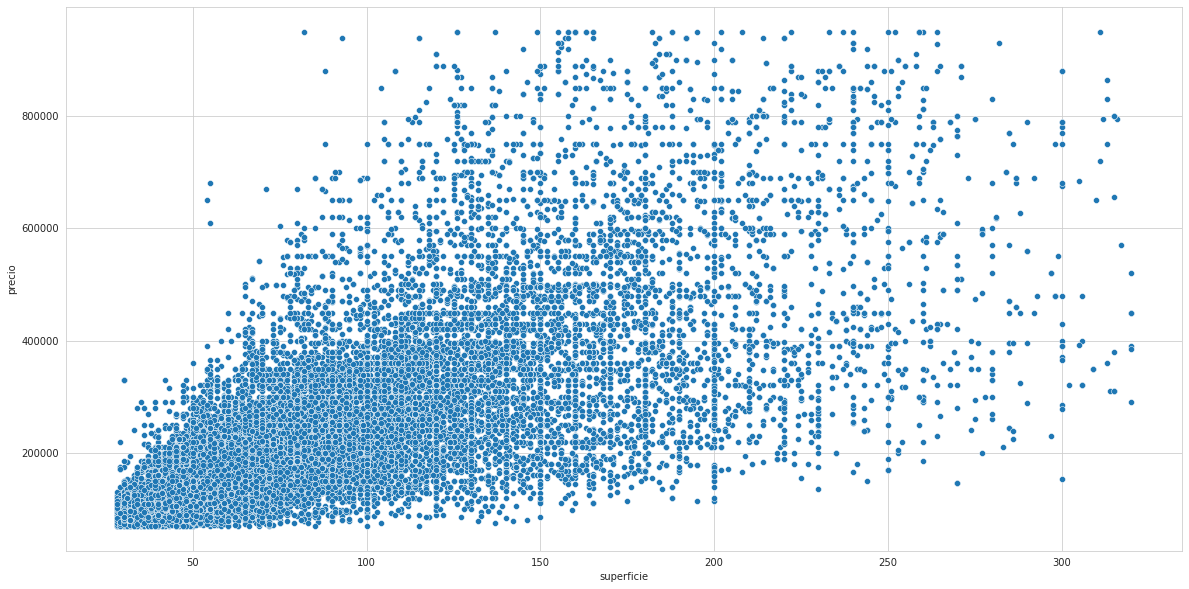

In [ ]:
sns.set_style("whitegrid") # para que los graficos posean un estilo particular utilizamos sns.set_style

fig, ax = plt.subplots(figsize = (20,10))


sns.scatterplot(x = 'superficie',
                y = 'precio',
                data = df,
                ax = ax
                )

# Regresion lineal


Como vimos en el grafico anterior, hace sentido que haya una relacion entre precio y superficie, con lo cual podemos proceder a estimar una regresion lineal, pero seria interesante realizarla a nivel barrio ya que encontramos una relacion aun mas fuerte.

Para esto, necesitaremos importar una libreria de Statsmodels.

https://www.statsmodels.org/stable/regression.html


Es importante tener en consideracion los siguientes conceptos, vistos en la teoria:

- R2
- Residuos


In [ ]:
# COMPLETAR CON UNA LINEA DE CODIGO QUE PERMITA FILTRAR EL DATAFRAME PARA MANTENER SOLO LOS DEPARTAMENTOS DE RECOLETA
recoleta = df[df["Barrio"]=="Recoleta"]


In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Ajustamos el modelo con una sóla lína de código, mediante la función "ols" del paquete "statmodels"
model = smf.ols("precio ~ superficie", data=recoleta).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        01:53:08   Log-Likelihood:                -32404.
No. Observations:                2554   AIC:                         6.481e+04
Df Residuals:                    2552   BIC:                         6.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.744e+04   3182.993      8.622      0.0

In [ ]:
# podemos acceder a los valores a traves de diferentes metodos

model.params

Intercept     27442.947319
superficie     2909.469425
dtype: float64

In [ ]:
model.rsquared

0.8088838310823827

Ya tenemos inicializada nuestra instacia de regresion lineal, y la hemos entrenado con los datos de superficie y precio, ahora deberiamos poder obtener los parametros para poder construir nuestra recta, recordemos que la funcion de la recta es:

      y = m * x + b


Donde b es la ordenada al origen y m la pendiente de la recta.

In [ ]:
m = model.params[1]

print('El valor de la pendiente de la recta es: {}'.format(m))

El valor de la pendiente de la recta es: 2909.4694253181583


In [ ]:
b = model.params[0]

print('El valor de la ordenada al origen de la recta es: {}'.format(b))

El valor de la ordenada al origen de la recta es: 27442.94731923957


In [ ]:
# ahora formulemos la recta
X = recoleta['superficie']
y = recoleta['precio']

y_pred = m * X + b
y_pred[:20]

42     111817.560653
43     140912.254907
81     295114.134449
106    274747.848471
135    225286.868241
136    196192.173988
137    152550.132608
138    300933.073299
139    362031.931231
188    129274.377205
189    178735.357436
190    138002.785481
191    120545.968929
192    126364.907780
193    149640.663183
194    303842.542724
232    231105.807092
233    219467.929390
259    475501.238818
260    647159.934912
Name: superficie, dtype: float64

In [ ]:
# tambien podemos utilizar una funcionalidad de la libreria llamada predict, esto nos simplifica el hecho de realizar la formula, verifiquemos si llegamos al mismo resultado

y_pred2 = model.predict(X)
y_pred2[:20]

42     111817.560653
43     140912.254907
81     295114.134449
106    274747.848471
135    225286.868241
136    196192.173988
137    152550.132608
138    300933.073299
139    362031.931231
188    129274.377205
189    178735.357436
190    138002.785481
191    120545.968929
192    126364.907780
193    149640.663183
194    303842.542724
232    231105.807092
233    219467.929390
259    475501.238818
260    647159.934912
dtype: float64

In [ ]:
# para obtener los residuos, simplemente restamos los valores de y reales, con los y predichos

residuos = y - y_pred

# para analizarlo estadisticamente lo convertiremos en una serie de pandas y luego utilizaremos el metodo "describe"
# tambien se pueden utilizar las funciones de Numpy para resumir estadisticamente al df, queda a criterio y facilidad de cada persona
residuos.describe()

count    2.554000e+03
mean    -1.082562e-11
std      7.834081e+04
min     -3.229997e+05
25%     -3.611413e+04
50%     -6.472093e+03
75%      3.012415e+04
max      5.559639e+05
dtype: float64

In [ ]:
# SCT es las suma total de los cuadrados de la distancia entre el valor de las y de la muestra y su media muestral y_raya
# SCR es la suma total dela diferencia elevada al cuadrado de la distancia entre las y de la muestra y las y ajustadas por el modelo
y_pred = (m * X + b)
SCT = sum((y - np.mean(y)) ** 2)
SCR = sum((y - y_pred) ** 2)

r2 = 1 - (SCR/SCT)
print('El valor es de R cuadrado es {}'.format(r2))

Ahora vamos a imprimir tanto los datos como la recta del modelo generado

Text(0.5, 1.0, 'Residuos')

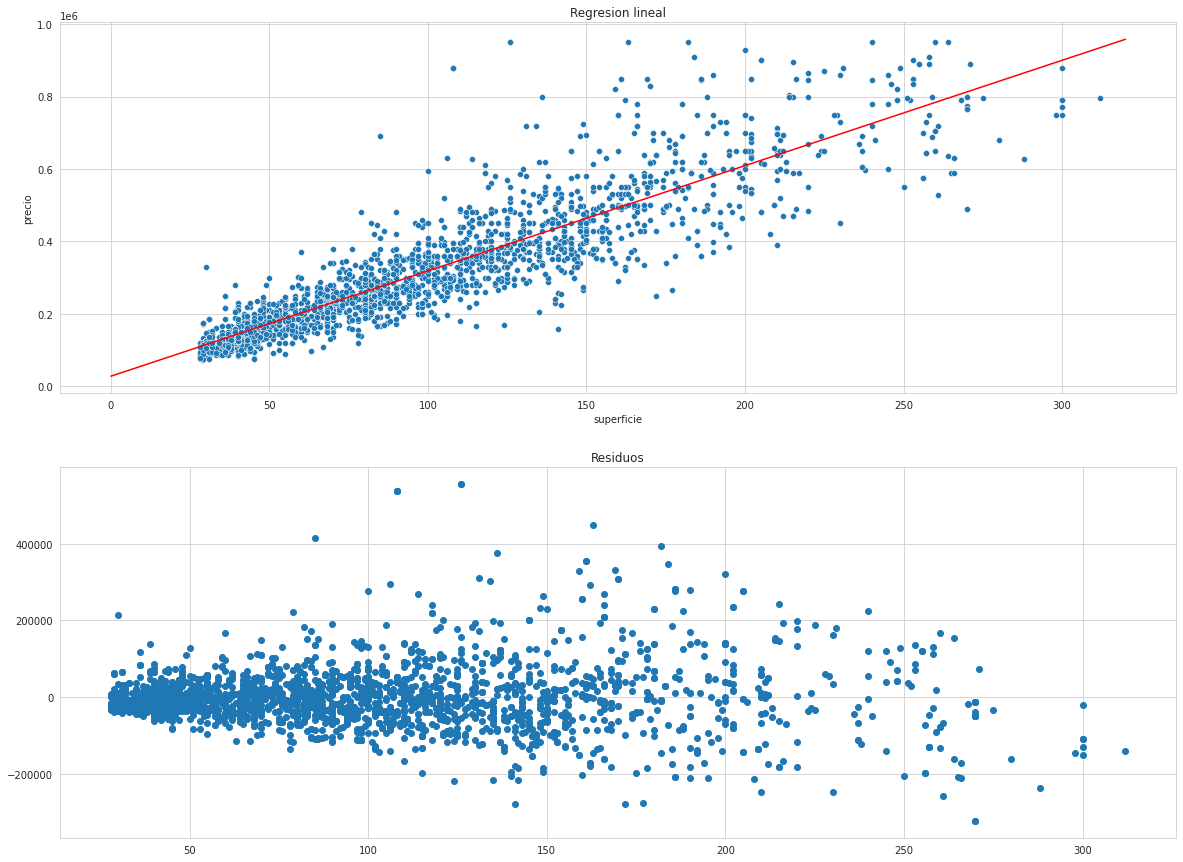

In [ ]:
x_recta = np.linspace(0, 320, 100)

y_recta = m * x_recta + b  # COMPLETAR CON LA FORMULA DE LA RECTA

fig, ax = plt.subplots(2, figsize = (20,15))

# en el primer grafico insertamos tanto la recta resultante del modelo de regresion lineal como los datos iniciales que utilizamos para 
ax[0].plot(x_recta, y_recta, c = 'r')
sns.scatterplot(x = 'superficie',       # COMPLETAR CON LOS DATOS FALTANTES
                y = 'precio',           # COMPLETAR CON LOS DATOS FALTANTES
                data =  recoleta,        # COMPLETAR CON LOS DATOS FALTANTES
                ax = ax[0]
                )
ax[0].set_title('Regresion lineal')

# en el segundo grafico insertamos un scatterplot con los residuos
ax[1].scatter(X, residuos)
ax[1].set_title('Residuos')

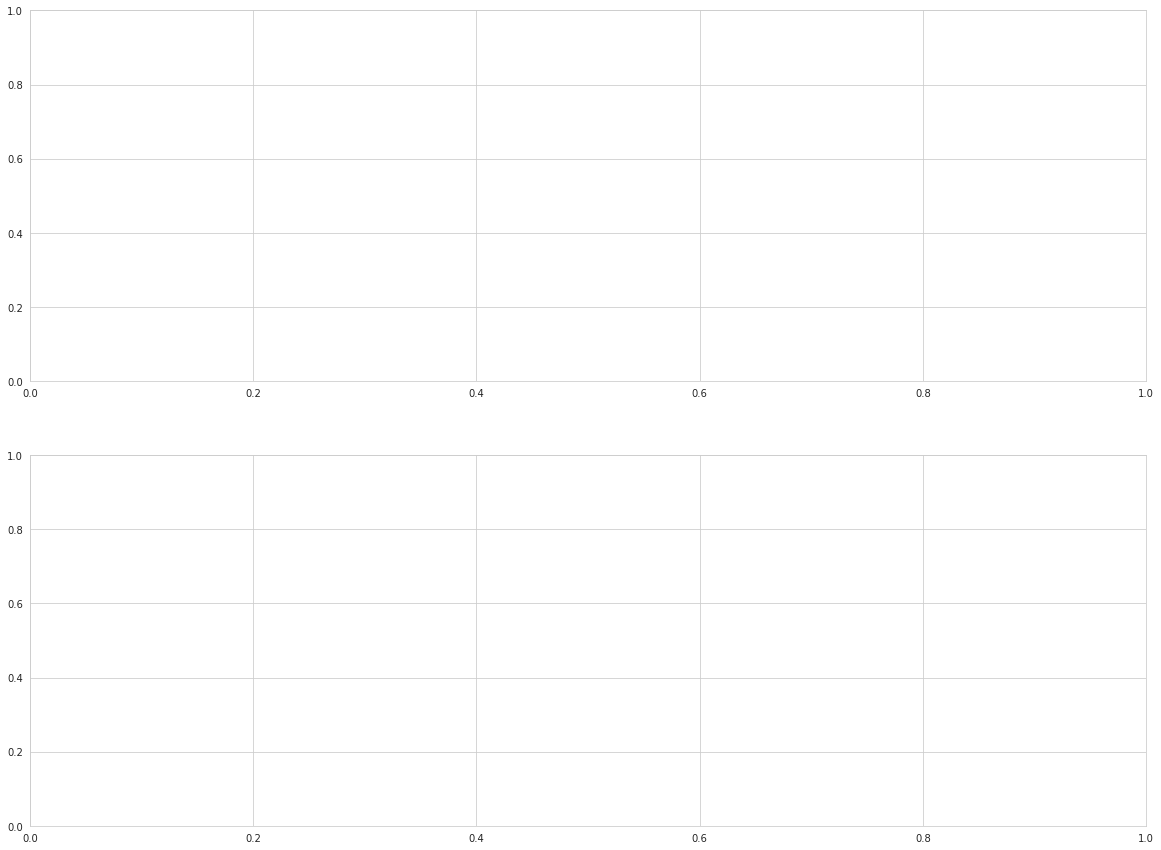

In [ ]:
# dato interesante para entender la funcion de plt.subplots(), la variable "ax", es una tupla del tamaño de el numero indicado. Dada esta propiedad podemos descomponerla la tupla en la misma formula 

fig, (ax0, ax1) = plt.subplots(2, figsize = (20,15))

# LOGRAR EL MISMO GRAFICO QUE EN LA LINEA ANTERIOR
# PISTA: AHORA LA TUPLA QUE OBTENIAMOS LLAMADA AX EN EL EJERCICIO ANTERIOR, YA LA ESTAMOS DESCOMPONIENDO EN LA MISMA LINEA DE CODIGO, CON LO CUAL
# ax[0] del ejecicicio anterior equivale a ax0 de este ejercicio.

# Predecir un valor

Si queremos predecir un valor podemos ir nuevamente por dos caminos:

- Reemplazar los valores en la formula obtenida
- Utilizar el método **.predict()** sobre el modelo generado


Probemos predecir un valor, y luego, una serie de valores. Vamos a definir las variables en la siguiente linea de codigo.

Una vez terminado el ejercicio, verifiquemos si graficamente nos hace sentido el resultado.

In [ ]:
superficie_unica = pd.Series(np.array(5), name='superficie') # el reshape lo hacemos para que el formato del arreglo tenga formato definido

superficie_mult = pd.Series(np.array([5, 10, 20, 30]), name='superficie')

In [ ]:
# CALCULAR LAS PREDICCIONES PARA UN VALOR UNICO Y PARA UN VALOR MULTIPLE




In [ ]:
# verificamos la prediccion de un valor simple

superficie_pred_unica

In [ ]:
# verificamos la prediccion de un arreglo

superficie_pred_mult

# Conclusiones

Como vimos hoy hay muchas formas diferentes de como llegar al mismo resultado, dependiendo el tipo de problema siempre va a haber una alternativa mas simple para su resolucion.

Invitamos a revisar las librerias de sklearn y numpy, ya que van a ser muy necesarias para las siguientes practicas.

# ACTIVIDADES

Las actividades propuestas para realizar son las siguientes:



1.   Graficar el dataset con diferentes aperturas para poder visualizar las relaciones. Para esto va a ser necesario utilizar una libreria de Python para graficar llamada Seaborn. El tipo de grafico que nos va a ayudar a especializar el grafico en funcion a condiciones para dos variables cualitativas es el **"RELPLOT"**, veamos como funciona:

          sns.relplot(x = 'superficie',
                y = 'precio',
                data = df,
                hue = '....', #lo que pongamos dentro de hue, varia con color en el grafico
                kind = 'scatter', # especificamos el tipo de grafico
                col = '....', # campo que va a distribuir el df en columnas
                row = '....' # campo que va a distribuir el df en filas
                )

      Es importante entender que no todos los campos tienen que ser completados, solo lo que necesitamos, es decir, puede estar solamente el hue, y no el col y row. Para entender todas las funcionalidades, recomendamos revisar la documentacion de relplot en seaborn: https://seaborn.pydata.org/generated/seaborn.relplot.html
2.   Elegir 3 barrios para hacer otro modelo de regresion lineal y verificar los R2 para entender si reponde bien o mal el precio en funcion a la superficie.
3.   Graficar los 3 modelos de regresion lineal con la recta de prediccion.
4.   Filtrar el DF para solo analizar los departamentos y armar un modelo de regresion lineal para los mismos en Recoleta.


